I removed the csv' because they took up quite a bit of space. This is just a showcase of classification problem I completed. I don't think it is solid enough to showcase.

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import Image
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna

In [95]:
df = pd.read_csv('train.csv')
df

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...,...
749995,749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26
749998,749998,31,68,29,Red,Cotton,9,11,12,20-20


In [96]:
df.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [97]:
df.drop('id', axis=1, inplace=True)

In [98]:
df['Fertilizer Name'].unique()

array(['28-28', '17-17-17', '10-26-26', 'DAP', '20-20', '14-35-14',
       'Urea'], dtype=object)

In [99]:
df['Fertilizer Name'].value_counts()

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

In [100]:
df['Fertilizer Name'] = df['Fertilizer Name'].map({'28-28':0, '17-17-17':1, '10-26-26':2, 'DAP':3, '20-20':4, '14-35-14':5,
       'Urea':6})
df['Fertilizer Name']

0         0
1         0
2         1
3         2
4         3
         ..
749995    0
749996    1
749997    2
749998    4
749999    6
Name: Fertilizer Name, Length: 750000, dtype: int64

In [101]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [102]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name     int64
dtype: object

In [103]:
print(df['Soil Type'].unique())
print(df['Crop Type'].unique())

['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']
['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat' 'Oil seeds']


In [104]:
df = pd.get_dummies(df, columns=['Soil Type', 'Crop Type'])
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,37,70,36,36,4,5,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,27,69,65,30,6,18,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,29,63,32,24,12,16,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,35,62,54,39,12,4,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,35,58,43,37,2,16,3,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,25,69,30,8,16,6,0,False,True,False,...,False,False,True,False,False,False,False,False,False,False
749996,37,64,58,38,8,20,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
749997,35,68,59,6,11,29,2,False,False,False,...,False,True,False,False,False,False,False,False,False,False
749998,31,68,29,9,11,12,4,False,False,False,...,True,False,False,False,False,False,False,False,False,False


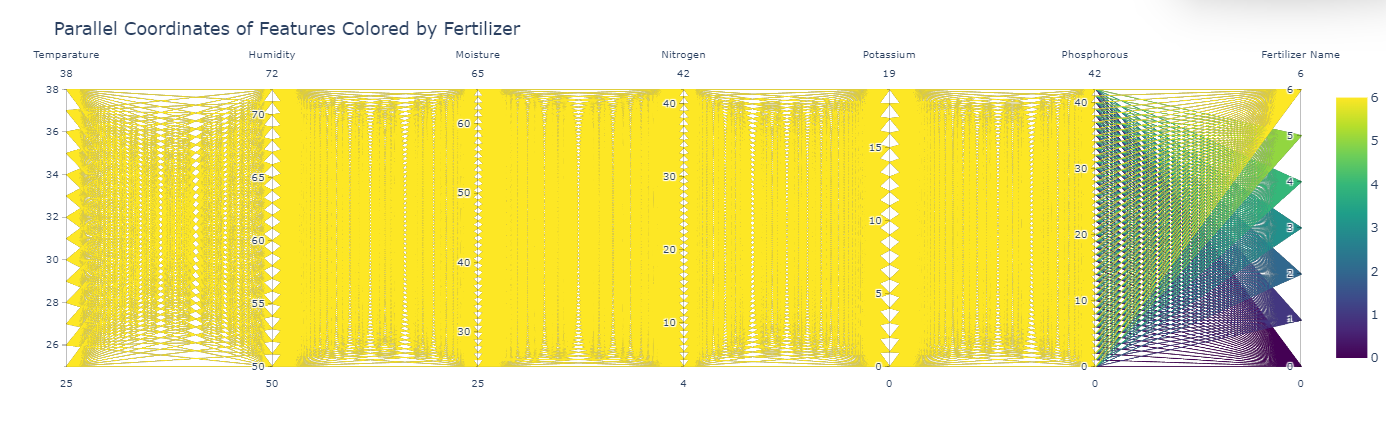

In [105]:
fig = go.Figure(data=go.Parcoords(
    line=dict(color=df['Fertilizer Name'], colorscale='Viridis', showscale=True),
    dimensions=[
        dict(label='Temparature', values=df['Temparature']),
        dict(label='Humidity', values=df['Humidity']),
        dict(label='Moisture', values=df['Moisture']),
        dict(label='Nitrogen', values=df['Nitrogen']),
        dict(label='Potassium', values=df['Potassium']),
        dict(label='Phosphorous', values=df['Phosphorous']),
        dict(label='Fertilizer Name', values=df['Fertilizer Name'])
    ]
))

fig.update_layout(
    title='Parallel Coordinates of Features Colored by Fertilizer',
)
Image('figures/Parallel.png')

In [106]:
correlation = df.corr()['Fertilizer Name'].drop('Fertilizer Name')
correlation = correlation.sort_values(key=abs, ascending=False)
print(correlation)


Soil Type_Clayey        -0.013085
Crop Type_Sugarcane     -0.012607
Crop Type_Ground Nuts   -0.008284
Soil Type_Black          0.007548
Soil Type_Red            0.007350
Crop Type_Millets        0.006896
Crop Type_Cotton         0.006272
Crop Type_Wheat          0.006208
Crop Type_Maize          0.005856
Humidity                 0.004761
Soil Type_Loamy         -0.004386
Phosphorous              0.003897
Crop Type_Paddy         -0.003834
Crop Type_Barley         0.003680
Crop Type_Pulses        -0.003369
Nitrogen                -0.003363
Temparature              0.003148
Moisture                 0.002623
Potassium               -0.002562
Soil Type_Sandy          0.002450
Crop Type_Oil seeds     -0.000597
Crop Type_Tobacco        0.000098
Name: Fertilizer Name, dtype: float64


In [ ]:
df['NPK_Ratio'] = (df['Nitrogen'] + df['Phosphorous'] + df['Potassium']) / 3
df['N_to_P_ratio'] = df['Nitrogen'] / (df['Phosphorous'] + 1e-6)
df['K_to_P_ratio'] = df['Potassium'] / (df['Phosphorous'] + 1e-6)

df['Temp_Humidity_Index'] = df['Temparature'] * df['Humidity']
df['Moisture_Deviation'] = df['Moisture'] - df['Humidity']

df['Nutrient_Skewness'] = df[['Nitrogen', 'Phosphorous', 'Potassium']].std(axis=1)


In [108]:
correlation = df.corr()['Fertilizer Name'].drop('Fertilizer Name')
correlation = correlation.sort_values(key=abs, ascending=False)
print(correlation)


Soil Type_Clayey        -0.013085
Crop Type_Sugarcane     -0.012607
Crop Type_Ground Nuts   -0.008284
N_to_P_ratio            -0.008010
K_to_P_ratio            -0.007815
Soil Type_Black          0.007548
Soil Type_Red            0.007350
Crop Type_Millets        0.006896
Crop Type_Cotton         0.006272
Crop Type_Wheat          0.006208
Crop Type_Maize          0.005856
Temp_Humidity_Index      0.005402
High_Nitrogen           -0.005214
Humidity                 0.004761
Soil Type_Loamy         -0.004386
Phosphorous              0.003897
Crop Type_Paddy         -0.003834
Crop Type_Barley         0.003680
Crop Type_Pulses        -0.003369
Nitrogen                -0.003363
Temparature              0.003148
Low_Phosphorous         -0.003028
Moisture                 0.002623
Potassium               -0.002562
Soil Type_Sandy          0.002450
Nutrient_Skewness       -0.001917
Crop Type_Oil seeds     -0.000597
Soil_Stress_Level        0.000573
NPK_Ratio               -0.000248
Crop Type_Toba

Not good linear correlation

In [109]:
y = df['Fertilizer Name']
X = df.drop('Fertilizer Name', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (600000, 31)
X_test shape: (150000, 31)
y_train shape: (600000,)
y_test shape: (150000,)


In [110]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

c:\Users\rowek\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[16:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [111]:
def mapk(actual, predicted, k=3):
    score = 0.0
    for a, p in zip(actual, predicted):
        try:
            score += 1 / (p.index(a) + 1)
        except ValueError:
            pass
    return score / len(actual)


In [ ]:
probs = model.predict_proba(X_test)
top3_idx = np.argsort(probs, axis=1)[:, -3:][:, ::-1]
top3_preds = top3_idx.tolist()

actual = y_test.tolist()

map3_score = mapk(actual, top3_preds, k=3)
print(f"MAP@3 Score: {map3_score:.4f}")

MAP@3 Score: 0.3241
